<a href="https://colab.research.google.com/github/ziraax/timesfm_torch/blob/main/TimesFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook attend to replicate the model presented in the paper : [A DECODER-ONLY FOUNDATION MODEL FOR TIME-SERIES FORECASTING](https://arxiv.org/pdf/2310.10688) from **Google Research** using **Pytorch**.
Note that everything here is granted as-is, and without any guarantee.



# **Summary of the Paper**

The paper, titled "A Decoder-Only Foundation Model for Time-Series Forecasting," presents TimesFM, a foundation model designed for time-series forecasting. This model leverages recent advancements in large language models (LLMs) for NLP to build a versatile time-series forecasting model that performs well across various datasets and scenarios without the need for fine-tuning or dataset-specific training.

## **Key Components**

### Motivation and Objective:
  - Goal: Develop a zero-shot time-series forecasting model that performs competitively with state-of-the-art supervised models on unseen datasets.
  - Challenges: Unlike NLP, time-series data lacks a standardized vocabulary or grammar, and there is limited availability of large-scale public time-series datasets.

### Model Design:
  - Architecture: Decoder-only transformer model inspired by language models but adapted for time-series data.
  - Patching: Time-series data is broken into patches, akin to tokens in NLP models, to manage long sequences and improve model efficiency.
  - Decoder-Only Approach: The model uses a decoder-only architecture for efficient training and prediction.

### Training Data:
  - Dataset Composition: Combines real-world (e.g., web search queries, Wikipedia page visits) and synthetic time-series data to create a large and diverse training corpus.

### Model Characteristics:
  - Flexibility: Capable of handling varying context lengths, prediction horizons, and time granularities.
  - Efficiency: Despite being smaller in parameter size and data volume compared to typical LLMs, TimesFM achieves competitive zero-shot performance.

### Comparison with Existing Models:
  - Performance: Demonstrates superior zero-shot performance compared to LLM-based forecasters (e.g., GPT-3, LLaMA-2) at a fraction of the cost.
  - State-of-the-Art: Matches or nearly matches the accuracy of best-in-class supervised models on various forecasting tasks.

# **Detailed Explanation**
  
### Introduction and Background:
  - Highlights the ubiquity and importance of time-series data in domains like retail, finance, healthcare, and more.
  - Discusses the rise of deep learning models in time-series forecasting and their advantages over classical statistical methods like ARIMA and GARCH.
  - Draws parallels with the success of large language models in NLP to motivate the development of a time-series foundation model.

### Related Work:
  - Reviews previous approaches in time-series forecasting, including local univariate models, global univariate models, and global multivariate models.
  - Notes recent attempts to use pretrained LLMs for time-series forecasting, emphasizing the novelty and efficiency of TimesFM in this context.

### Model Architecture:
  - Input Layer: Processes time-series into patches, each processed into a vector by a residual block.
  - Stacked Transformer Layers: Utilizes multi-head self-attention with causal attention to ensure each output token attends to only preceding tokens.
  - Output Layer: Maps the encoded information into future time-series predictions.
  - Loss Function: Uses Mean Squared Error (MSE) for point forecasting, with flexibility for probabilistic forecasting if needed.

### Training Strategy:
  - Describes the use of mini-batch gradient descent and a unique patch masking strategy to ensure the model learns across varying context lengths.

### Experiments and Results:
  - Dataset Variety: Evaluates the model on diverse unseen datasets, demonstrating robust zero-shot performance.
  - Performance Metrics: Compares TimesFM's accuracy to supervised models, showing close or superior results.

### Conclusion:
  - Summarizes the effectiveness of TimesFM as a practical, efficient solution for time-series forecasting.
  - Suggests potential future directions, including further scaling and fine-tuning for specific applications.

### Implications and Benefits
  - Efficiency: TimesFM provides a highly efficient alternative to traditional supervised models, significantly reducing training and computational costs.
  - Versatility: The model's ability to perform well across different datasets and scenarios without additional training makes it highly versatile for real-world applications.
  - Foundation for Future Work: Sets a new benchmark for zero-shot time-series forecasting, paving the way for further research and development in this area.

## **More on the model architecture**

TimesFM leverages a decoder-only transformer architecture, which is inspired by large language models (LLMs) but adapted for the unique characteristics of time-series data. The key components of the architecture include the input processing, transformer layers, and the output generation.

### Detailed Components

  1. **Input Processing:**

    *Time-Series Patching*:
        The continuous time-series data is divided into fixed-size patches. Each patch represents a segment of the time-series data.
        This approach is akin to tokenizing text in NLP models, where patches serve as the basic units of input.

    *Embedding*:
        Each patch is embedded into a higher-dimensional space using a linear embedding layer. This transforms the raw time-series values into vectors that the model can process.
        The embedding layer is followed by a residual block that helps stabilize the training and enhances the model's ability to capture complex patterns.

  2. **Transformer Layers:**

    *Multi-Head Self-Attention*:
        Self-attention allows the model to weigh the importance of different patches when making predictions. In the context of time-series, it helps the model understand dependencies across different time steps.
        Multi-head attention involves multiple attention mechanisms running in parallel, providing the model with the ability to capture various aspects of the data's structure.

    *Causal Attention*:
        Causal attention ensures that each output only depends on the current and past inputs, preventing information leakage from future patches. This is crucial for time-series forecasting, where predictions at a given time should not be influenced by future data.

    *Feed-Forward Neural Network*:
        Each transformer layer includes a position-wise feed-forward network, applied independently to each position (patch) in the sequence.
        The feed-forward network consists of two linear transformations with a ReLU activation in between.

    *Residual Connections and Layer Normalization*:
        Residual connections are used around each sub-layer (multi-head attention and feed-forward network) to facilitate gradient flow and prevent vanishing gradients.
        Layer normalization is applied to stabilize and speed up training.

  3. **Output Generation:**

    *Prediction Layer*:
        The final layer of the model maps the output from the transformer layers to the predicted time-series values. This is typically a linear transformation.
        For point forecasting, the model directly outputs the future values. For probabilistic forecasting, it can output parameters of a probability distribution.

    *Loss Function*:
        The primary loss function used is Mean Squared Error (MSE), which measures the average squared difference between the predicted and actual values. MSE is suitable for point forecasts where the objective is to minimize the prediction error.
        The model is flexible enough to accommodate other loss functions for different forecasting objectives, such as probabilistic forecasts.

  4. **Advantages of the Architecture**

    *Scalability*:
        The transformer architecture is highly scalable, allowing the model to handle long time-series by processing patches in parallel. This is essential for efficiently dealing with large datasets.

    *Flexibility*:
        By using a decoder-only approach, TimesFM can generate predictions iteratively, making it suitable for a variety of forecasting horizons and granularities.
        The model's structure allows for handling diverse time-series data without needing dataset-specific customization.

    *Efficiency*:
        Despite being smaller in size compared to typical LLMs, TimesFM achieves competitive performance due to its efficient use of the transformer architecture and effective training strategies.

    *Generalization*:
        The use of diverse training data (both real-world and synthetic) enables the model to generalize well to unseen datasets, providing robust zero-shot performance.



# Diagram of the Model Architecture

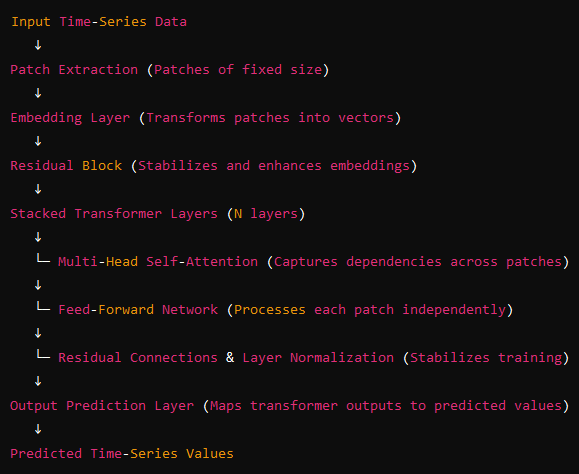

# Training Strategy

  - Mini-Batch Gradient Descent: The model is trained using mini-batch gradient descent, which is efficient for large datasets and helps in generalization.
  - Patch Masking Strategy: During training, a masking strategy is used to ensure the model learns effectively across varying context lengths, preventing overfitting to specific patterns.

# Importing libs

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

# Multi-head self-attention layer

In [3]:
# Sorry i comment my code in french, but will be removed to be in english

class MultiHeadAttention(nn.Module):

  def __init__(self, d_model, num_heads):

    """
    d_model : La dimension de l'espace de représentation des embeddings d'entrée
    et de sortie.

    num_heads : Le nombre de têtes d'attention. Chaque tête d'attention apprend
    à capturer différents aspects des dépendances dans la séquence d'entrée.

    depth : La dimension de chaque tête d'attention, calculée comme d_model // num_heads.
    Ceci assure que la concaténation des sorties de toutes les têtes donne une
    représentation de dimension d_model.

    Les transformations linéaires wq, wk, et wv sont utilisées pour générer les
    matrices de requêtes (queries), de clés (keys), et de valeurs (values)
    respectivement. La transformation dense est appliquée après l'opération
    d'attention pour obtenir la sortie finale.
    """

    super(MultiHeadAttention, self).__init__()
    assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

    self.d_model = d_model
    self.num_heads = num_heads
    self.depth = d_model // num_heads

    self.wq = nn.Linear(d_model, d_model)
    self.wk = nn.Linear(d_model, d_model)
    self.wv = nn.Linear(d_model, d_model)
    self.dense = nn.Linear(d_model, d_model)

  def split_heads(self, x, batch_size):
    """
    Cette fonction réorganise les dimensions du tenseur x afin de séparer les têtes d'attention :

    x.view(batch_size, -1, self.num_heads, self.depth) : Réorganise le tenseur
    pour avoir num_heads têtes avec depth dimensions chacune. La nouvelle forme
    est [batch_size, seq_length, num_heads, depth].

    permute(0, 2, 1, 3) : Permute les dimensions pour obtenir la forme
    [batch_size, num_heads, seq_length, depth], ce qui est nécessaire pour
    le calcul de l'attention multi-tête.
    """
    x = x.view(batch_size, -1, self.num_heads, self.depth)
    return x.permute(0, 2, 1, 3)

  def forward(self, x, mask=None):
    """
    Les transformations linéaires wq, wk, et wv sont appliquées à l'entrée x
    pour obtenir les requêtes, clés, et valeurs, qui sont ensuite réorganisées
    pour les têtes d'attention.
    """
    batch_size = x.size(0)

    q = self.split_heads(self.wq(x), batch_size)
    k = self.split_heads(self.wk(x), batch_size)
    v = self.split_heads(self.wv(x), batch_size)

    """
    Les scores d'attention sont calculés en prenant le produit scalaire des
    requêtes et des clés, normalisé par la racine carrée de la profondeur.
    Cette normalisation aide à stabiliser les gradients lors de l'entraînement.
    """
    scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(self.depth)

    if mask is not None:
      scores += (mask * -1e9)

    attn_weights = F.softmax(scores, dim=-1)
    output = torch.matmul(attn_weights, v)

    output = output.permute(0, 2, 1, 3).contiguous().view(batch_size, -1, self.d_model)
    output = self.dense(output)

    return output

# Feed-forward layer

In [4]:
class FeedForward(nn.Module):
  def __init__(self, d_model, d_ff, dropout=0.1):
    super(FeedForward, self).__init__()
    self.linear1 = nn.Linear(d_model, d_ff)
    self.dropout = nn.Dropout(dropout)
    self.linear2 = nn.Linear(d_ff, d_model)

  def forward(self, x):
    x = self.dropout(F.relu(self.linear1(x)))
    x = self.linear2(x)
    return x


# Normalization & residual layer

In [23]:
class LayerNormResidual(nn.Module):
  def __init__(self, d_model, sublayer):
    super(LayerNormResidual, self).__init__()
    self.sublayer = sublayer
    self.norm = nn.LayerNorm(d_model)

  def forward(self, x, *args, **kwargs):
    return x + self.sublayer(self.norm(x), *args, **kwargs)

# Transformer Decoder Layer

In [6]:
class TransformerDecoderLayer(nn.Module):
  def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
    super(TransformerDecoderLayer, self).__init__()
    self.attention = LayerNormResidual(d_model, MultiHeadAttention(d_model, num_heads))
    self.feed_forward = LayerNormResidual(d_model, FeedForward(d_model, d_ff, dropout))

  def forward(self, x, mask=None):
    x = self.attention(x, mask)
    x = self.feed_forward(x)
    return x

# Complete model

In [7]:
class TimesFM(nn.Module):
  def __init__(self, input_size, d_model, num_heads, num_layers, d_ff, dropout=0.1):
    super(TimesFM, self).__init__()
    self.embedding = nn.Linear(input_size, d_model)
    self.pos_embedding = nn.Parameter(torch.zeros(1, 5000, d_model))
    self.layers = nn.ModuleList([TransformerDecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
    self.output_layer = nn.Linear(d_model, input_size)

  def forward(self, x, mask=None):
    seq_length = x.size(1)
    x = self.embedding(x)
    x += self.pos_embedding[:, :seq_length, :]

    for layer in self.layers:
      x = layer(x, mask)

    x = self.output_layer(x)
    return x


def create_causal_mask(size):
  mask = torch.triu(torch.ones(size, size), diagonal=1)
  mask = mask.masked_fill(mask == 1, float('-inf'))
  return mask

# Training

In [11]:
import torch

# Check if CUDA (GPU acceleration) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [21]:
def create_sequence_windows(data, target, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length + 1):  # Adjusted loop to include all valid windows
        sequences.append(data[i:i+seq_length])
        targets.append(target[i+seq_length-1])  # Use the last element as target for each window
    return torch.stack(sequences), torch.stack(targets)


In [17]:
def train(model, data_loader, criterion, optimizer, num_epochs):
  model.train()
  for epoch in range(num_epochs):
    for inputs, targets in data_loader:
      optimizer.zero_grad()

      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)

      target_shape = outputs.shape  # [batch_size, seq_length, 1]
      targets_expanded = targets.unsqueeze(1).expand(-1, target_shape[1], -1)

      loss = criterion(outputs, targets_expanded)
      loss.backward()
      optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Exemple

In [9]:
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [22]:
# Synthetical data
data = np.sin(np.linspace(0, 100, 5000))
X = np.array([data[i:i+50] for i in range(len(data)-50)])
y = np.array([data[i+50] for i in range(len(data)-50)])

X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

X_seq, y_seq = create_sequence_windows(X, y, seq_length=50)

dataset = TensorDataset(X_seq, y_seq)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialisation du modèle
model = TimesFM(input_size=1, d_model=128, num_heads=8, num_layers=6, d_ff=512)
model = model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train(model, data_loader, criterion, optimizer, num_epochs=20)

RuntimeError: The size of tensor a (50) must match the size of tensor b (2500) at non-singleton dimension 2